In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns


### Load The Dataset And Analysis

In [2]:
df = pd.read_csv("parkinsons.data")
# printing the first 5 rows of the dataframe
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
# the shape of dataframe
df.shape # (number of rows = 195 , number of columns = 24 )

(195, 24)

In [4]:
# getting more information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [5]:
# drop the column = "name" from dataframe
df = df.drop(columns = "name" , axis = 1 )

In [6]:
# checking for missing values in each column
df.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [7]:
# getting sخme statistical measures about the data
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [8]:
# distribution of target variable
df['status'].value_counts()  
# imbalanced dataset >> (0 = heaalthy , 1 = parkinson's)

status
1    147
0     48
Name: count, dtype: int64

In [9]:
# grouping the data based on the target variable
df.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


### Data Preprocessing (feature scaling )

In [10]:
from sklearn.preprocessing import RobustScaler

# splitting data into X (features) and y (target)
X = df.drop(columns ='status' , axis = 1 )
y = df['status']


In [12]:
# splitting data into trainning data and testing data 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split (X , y , stratify= y , random_state= 42 , test_size=0.2)


In [13]:
print(y_train.value_counts(normalize=True))
print( y_test.value_counts(normalize=True))


status
1    0.75641
0    0.24359
Name: proportion, dtype: float64
status
1    0.74359
0    0.25641
Name: proportion, dtype: float64


In [14]:
from sklearn.preprocessing import RobustScaler

scaling = RobustScaler()

X_train_scaled = scaling.fit_transform(X_train)

X_test_scaled = scaling.transform(X_test)

## Model comparison Training  

### 1- logistic Regression 

In [24]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score 
logistic = LogisticRegression(max_iter = 200) 
logistic.fit(X_train_scaled ,y_train ) 
prediction_logistic = logistic.predict(X_test_scaled) 
accuracy_logistic = accuracy_score(y_test, prediction_logistic) 
print(f"Model Accuracy logistic : {accuracy_logistic}")

Model Accuracy logistic : 0.9230769230769231


### 2-Support Vector Classifier

In [25]:
from sklearn import svm 

# Create an SVC classifier with an RBF kernel
clf = svm.SVC(
    kernel='rbf',
    C=10,
    gamma=0.1,
    class_weight='balanced'
)

# Train the model
clf.fit(X_train_scaled, y_train)

# Make predictions
predictions_clf = clf.predict(X_test_scaled)

accuracy_svc = accuracy_score(y_test, predictions_clf)
print(f"Model Accuracy svc : {accuracy_svc}")


Model Accuracy svc : 0.8974358974358975


### 3-Random forest classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Model accuracy Random forst classifier : {accuracy_rf}")




Model accuracy Random forst classifier : 0.9230769230769231


In [27]:
from sklearn.metrics import precision_score , recall_score , f1_score

def evaluate_model (y_true , y_pred , model_name ):
    precision = precision_score (y_true , y_pred)
    recall = recall_score (y_true , y_pred )
    f1 = f1_score (y_true , y_pred )
    
    print(f"📊 {model_name}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1-score:  {f1:.4f}")
    print("-" * 30)

In [28]:
evaluate_model(y_test, prediction_logistic, "Logistic Regression")
evaluate_model(y_test, predictions_clf, "SVM")
evaluate_model(y_test, y_pred_rf, "Random Forest")


📊 Logistic Regression
Precision: 0.9333
Recall:    0.9655
F1-score:  0.9492
------------------------------
📊 SVM
Precision: 0.9310
Recall:    0.9310
F1-score:  0.9310
------------------------------
📊 Random Forest
Precision: 0.9333
Recall:    0.9655
F1-score:  0.9492
------------------------------


### Confusion Matrix

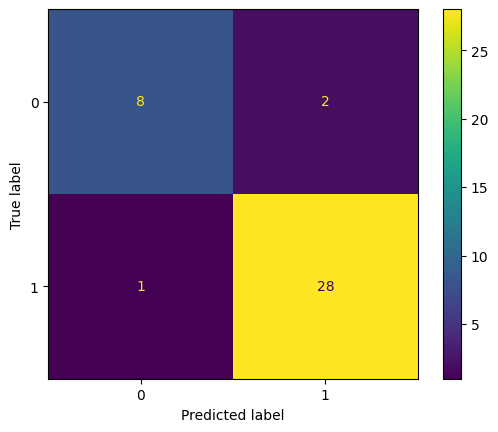

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, prediction_logistic)
disp = ConfusionMatrixDisplay(cm)
disp.plot()


### ROC Curve + AUC

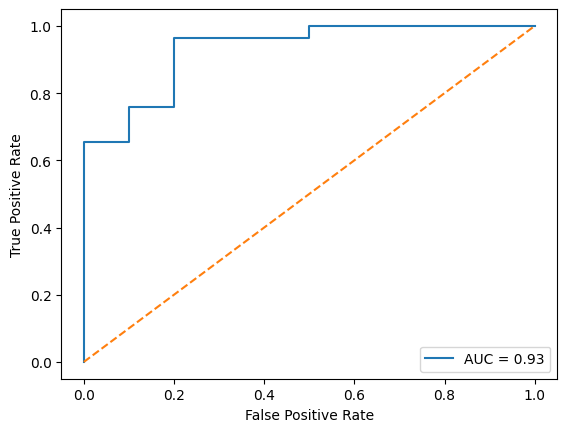

In [30]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = logistic.predict_proba(X_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


### Cross Validation

In [31]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(
    logistic,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='f1'
)

print("CV F1 scores:", cv_scores)
print("Mean F1:", cv_scores.mean())


CV F1 scores: [0.89795918 0.92       0.82608696 0.90196078 0.93617021]
Mean F1: 0.8964354274549784


### Feature Importance 

In [33]:
import pandas as pd

feature_importance = pd.Series(
    logistic.coef_[0],
    index=X.columns
).sort_values(key=abs, ascending=False)

feature_importance.head(10)


spread1             1.210413
PPE                 0.938248
MDVP:APQ            0.922549
D2                  0.821092
MDVP:Jitter(%)     -0.549857
MDVP:Jitter(Abs)   -0.484910
spread2             0.480512
MDVP:RAP            0.470325
Jitter:DDP          0.468457
RPDE               -0.315734
dtype: float64

### Feature Importance Bar Chart

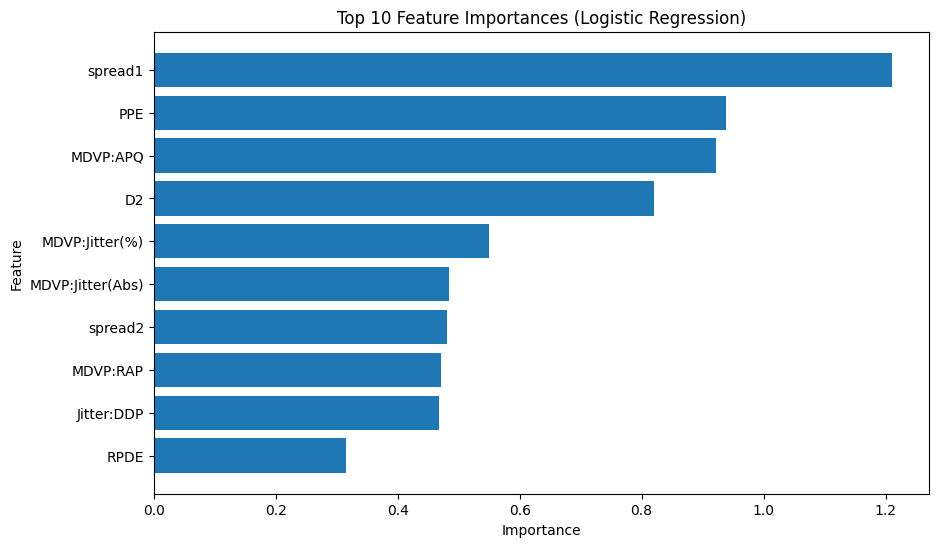

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# coefficients from trained logistic regression model
coefficients = logistic.coef_[0]

# feature names
features = X.columns

# create dataframe
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': coefficients
})

# take absolute value for importance
feature_importance['Absolute Importance'] = feature_importance['Importance'].abs()

# sort by importance
feature_importance = feature_importance.sort_values(
    by='Absolute Importance',
    ascending=False
)

# plot
plt.figure(figsize=(10,6))
plt.barh(
    feature_importance['Feature'][:10],
    feature_importance['Absolute Importance'][:10]
)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Logistic Regression)')
plt.gca().invert_yaxis()
plt.show()


### Feature Importance Analysis

Using Logistic Regression coefficients, we analyzed the most influential features affecting Parkinson’s Disease detection.

The most important features were:
- **spread1** and **PPE**, which are strongly related to vocal signal irregularity.
- **MDVP:APQ** and **D2**, indicating amplitude perturbation and non-linear dynamics in voice signals.

These results align with medical knowledge, as Parkinson’s Disease significantly affects speech stability and vocal control.
